In [ ]:
import os
import random
import shutil
import matplotlib.pyplot as plt
from collections import Counter

base_dir = r"D:\Random_Projects\IDCamp\Proyek 2"
categories = ["cat", "dog", "spider"]
category_counts = {category: len(os.listdir(os.path.join(base_dir, category))) for category in categories}
print("Initial Image Counts:", category_counts)
min_count = min(category_counts.values())
print(f"Balancing dataset to {min_count} images per category")

Initial Image Counts: {'cat': 4705, 'dog': 7790, 'spider': 4821}
Balancing dataset to 4705 images per category


In [ ]:
#Create balanced dataset folder to train a CNNmodel
balanced_dir = os.path.join(base_dir, "balanced")
os.makedirs(balanced_dir, exist_ok=True)
for category in categories:
    source_path = os.path.join(base_dir, category)
    dest_path = os.path.join(balanced_dir, category)
    os.makedirs(dest_path, exist_ok=True)
    selected_files = random.sample(os.listdir(source_path), min_count)
    for file in selected_files:
        shutil.copy2(os.path.join(source_path, file), os.path.join(dest_path, file))
print("Dataset balanced!")

Dataset balanced!


In [6]:
#Split into train, val, test (80:10:10, try different ratios later)
split_ratios = {"train": 0.8, "val": 0.1, "test": 0.1}
split_dirs = {key: os.path.join(base_dir, key) for key in split_ratios}

for key in split_dirs.values():
    os.makedirs(key, exist_ok=True)
    for category in categories:
        os.makedirs(os.path.join(key, category), exist_ok=True)

for category in categories:
    files = os.listdir(os.path.join(balanced_dir, category))
    random.shuffle(files)
    train_split = int(split_ratios["train"] * min_count)
    val_split = int(split_ratios["val"] * min_count)
    train_files = files[:train_split]
    val_files = files[train_split:train_split + val_split]
    test_files = files[train_split + val_split:]
    
    for split, split_files in zip(["train", "val", "test"], [train_files, val_files, test_files]):
        for file in split_files:
            shutil.copy2(os.path.join(balanced_dir, category, file), os.path.join(base_dir, split, category, file))
print("Train, Val, Test split completed!")

Train, Val, Test split completed!


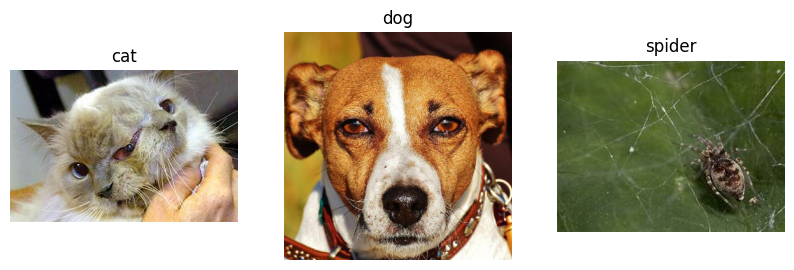

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
for ax, category in zip(axes, categories):
    sample_image = random.choice(os.listdir(os.path.join(base_dir, "train", category)))
    img = plt.imread(os.path.join(base_dir, "train", category, sample_image))
    ax.imshow(img)
    ax.set_title(category)
    ax.axis("off")

plt.show()